Customers Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 

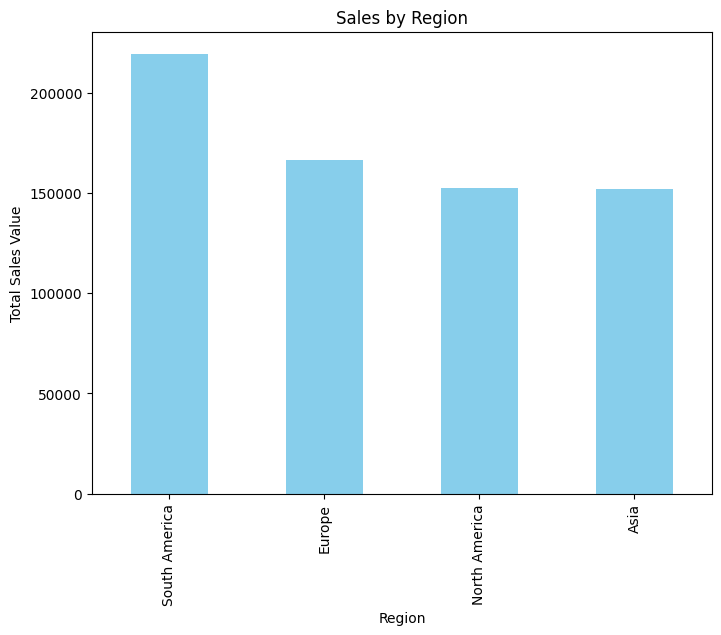

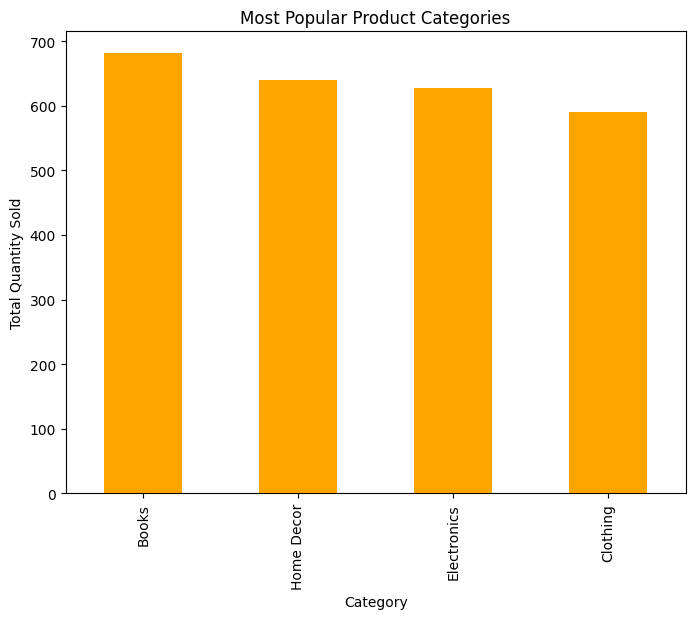

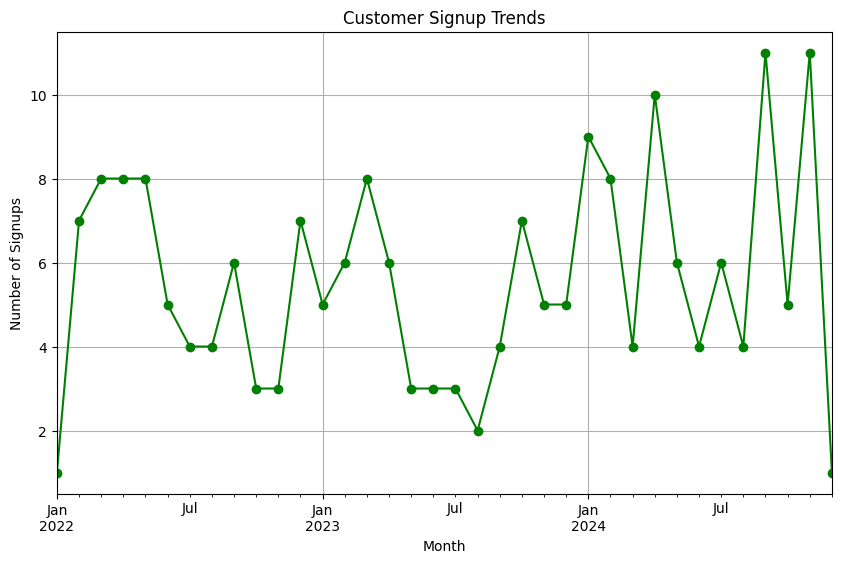

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("/content/Customers.csv")
products = pd.read_csv("/content/Products.csv")
transactions = pd.read_csv("/content/Transactions.csv")

# Inspect datasets
print("Customers Data")
print(customers.info())
print(customers.head())

print("\nProducts Data")
print(products.info())
print(products.head())

print("\nTransactions Data")
print(transactions.info())
print(transactions.head())

# Check for missing values
print("\nMissing Values:")
print("Customers:", customers.isnull().sum())
print("Products:", products.isnull().sum())
print("Transactions:", transactions.isnull().sum())

# Merge datasets for analysis
merged = transactions.merge(customers, on="CustomerID", how="inner") \
                     .merge(products, on="ProductID", how="inner")

# Basic statistics
print("\nSummary Statistics:")
print(merged.describe())

# EDA: Sales by region
sales_by_region = merged.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sales_by_region.plot(kind="bar", color="skyblue")
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales Value")
plt.show()

# EDA: Popular product categories
popular_categories = merged.groupby("Category")["Quantity"].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
popular_categories.plot(kind="bar", color="orange")
plt.title("Most Popular Product Categories")
plt.xlabel("Category")
plt.ylabel("Total Quantity Sold")
plt.show()

# EDA: Customer signup trends
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])
signup_trends = customers["SignupDate"].dt.to_period("M").value_counts().sort_index()
plt.figure(figsize=(10, 6))
signup_trends.plot(kind="line", marker="o", color="green")
plt.title("Customer Signup Trends")
plt.xlabel("Month")
plt.ylabel("Number of Signups")
plt.grid(True)
plt.show()
